In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-placement/placement-dataset.csv


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plt

In [22]:
data = pd.read_csv('/kaggle/input/college-placement/placement-dataset.csv')

In [23]:
data.head(10)

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0
5,Chicago,7.1,48.0,1
6,New York,5.7,NaN,0
7,Los Angeles,5.0,63.0,0
8,Chicago,6.1,156.0,0
9,New York,5.1,66.0,0


In [24]:
data.tail(10)

,city,cgpa,iq,placement
90,New York,7.3,86.0,1
91,Los Angeles,7.5,158.0,1
92,Chicago,5.2,110.0,0
93,New York,6.8,112.0,1
94,Los Angeles,4.7,52.0,0
95,Chicago,4.3,200.0,0
96,New York,4.4,42.0,0
97,Los Angeles,6.7,182.0,1
98,Chicago,6.3,103.0,1
99,New York,6.2,113.0,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       100 non-null    object 
 1   cgpa       92 non-null     float64
 2   iq         96 non-null     float64
 3   placement  100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [26]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values

city         0
cgpa         8
iq           4
placement    0
dtype: int64

In [27]:
# Drop rows with any NaN values
new_data_dropped_rows = data.dropna(axis=0) 

print(new_data_dropped_rows)

           city  cgpa     iq  placement
0      New York   6.8  123.0          1
1   Los Angeles   5.9  106.0          0
3      New York   7.4  132.0          1
4   Los Angeles   5.8  142.0          0
5       Chicago   7.1   48.0          1
..          ...   ...    ...        ...
95      Chicago   4.3  200.0          0
96     New York   4.4   42.0          0
97  Los Angeles   6.7  182.0          1
98      Chicago   6.3  103.0          1
99     New York   6.2  113.0          1

[88 rows x 4 columns]


In [28]:
new_data_dropped_rows

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0
5,Chicago,7.1,48.0,1
...,...,...,...,...
95,Chicago,4.3,200.0,0
96,New York,4.4,42.0,0
97,Los Angeles,6.7,182.0,1
98,Chicago,6.3,103.0,1


In [29]:
new_data_dropped_rows.describe()

,cgpa,iq,placement
count,88.000000,88.000000,88.000000
mean,6.001136,123.454545,0.500000
std,1.166042,41.520777,0.502865
min,3.300000,37.000000,0.000000
25%,5.075000,100.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


Convert Data from Pandas to NumPy

In [30]:
# Assuming 'city' is the only categorical column that needs to be converted to numeric codes
new_data_dropped_rows['city'] = new_data_dropped_rows['city'].astype('category').cat.codes

# Now convert the entire DataFrame to a NumPy array
placement_np = new_data_dropped_rows.to_numpy()

# Display the first few rows of the numpy array to verify conversion
print(placement_np[:5])

[[  2.    6.8 123.    1. ]
 [  1.    5.9 106.    0. ]
 [  2.    7.4 132.    1. ]
 [  1.    5.8 142.    0. ]
 [  0.    7.1  48.    1. ]]


/tmp/ipykernel_33/165517154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_dropped_rows['city'] = new_data_dropped_rows['city'].astype('category').cat.codes


Data Visualization - CGPA vs. IQ for First 10 Students (Placement Status)

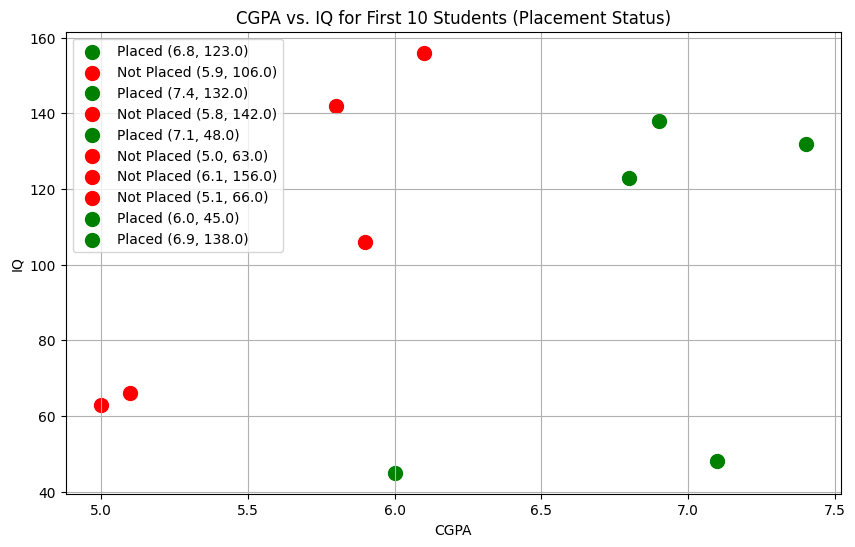

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


# Consider only the first 10 rows for visualization
placement_df_subset = new_data_dropped_rows.head(10)

# Assuming 'city' is already converted to numeric or is not included in this specific plot
# Plotting
plt.figure(figsize=(10, 6))
for _, row in placement_df_subset.iterrows():
    color = 'green' if row['placement'] == 1 else 'red'
    plt.scatter(row['cgpa'], row['iq'], color=color, s=100, label=f"{'Placed' if row['placement'] == 1 else 'Not Placed'} ({row['cgpa']}, {row['iq']})")

plt.title('CGPA vs. IQ for First 10 Students (Placement Status)')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.legend()
plt.grid(True)
plt.show()